In [ ]:
import os
import pandas as pd
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# path of csv files
directory = r"/content/drive/MyDrive/Csvs1"

In [ ]:
lst = []
for file in os.listdir(directory):
    fpath = os.path.join(directory,file)
    df_temp = pd.read_csv(fpath)
    df_temp['Channel'] = file.split('.')[0]
    lst.append(df_temp)

In [ ]:
df_full = pd.concat(lst)

In [ ]:
df_full.head()

,Unnamed: 0,Filename,Label,Absolute_Alpha,Relative_Alpha,Absolute_Beta,Relative_Beta,Absolute_Theta,Relative_Theta,Absolute_Delta,Relative_Delta,Channel
0,0,v173.mat,ADHD,1623.303060,0.109361,1767.356771,0.119066,3810.068359,0.256682,6486.032552,0.436960,C3
1,1,v14p.mat,ADHD,3885.988932,0.058442,2675.695475,0.040240,5680.210286,0.085425,20269.679688,0.304838,C3
2,2,v12p.mat,ADHD,2720.415690,0.024331,1104.299479,0.009877,5100.318359,0.045617,15617.141927,0.139678,C3
3,3,v15p.mat,ADHD,2196.946289,0.045699,970.403239,0.020185,5200.852214,0.108183,29266.421875,0.608773,C3
4,4,v10p.mat,ADHD,3569.600727,0.102675,1313.958923,0.037794,2701.586405,0.077708,14201.884666,0.408498,C3


In [ ]:
# df_full['Label'] = df_full['Label'].replace(['ADHD','Non_ADHD'],[1,0])
df_full.drop(['Unnamed: 0','Channel','Filename'],axis=1,inplace=True)

In [ ]:
df = pd.get_dummies(df_full)

In [ ]:
df_full.head()

,Label,Absolute_Alpha,Relative_Alpha,Absolute_Beta,Relative_Beta,Absolute_Theta,Relative_Theta,Absolute_Delta,Relative_Delta
0,ADHD,1623.303060,0.109361,1767.356771,0.119066,3810.068359,0.256682,6486.032552,0.436960
1,ADHD,3885.988932,0.058442,2675.695475,0.040240,5680.210286,0.085425,20269.679688,0.304838
2,ADHD,2720.415690,0.024331,1104.299479,0.009877,5100.318359,0.045617,15617.141927,0.139678
3,ADHD,2196.946289,0.045699,970.403239,0.020185,5200.852214,0.108183,29266.421875,0.608773
4,ADHD,3569.600727,0.102675,1313.958923,0.037794,2701.586405,0.077708,14201.884666,0.408498


In [ ]:
df

,Absolute_Alpha,Relative_Alpha,Absolute_Beta,Relative_Beta,Absolute_Theta,Relative_Theta,Absolute_Delta,Relative_Delta,Label_ADHD,Label_Non_ADHD
0,1623.303060,0.109361,1767.356771,0.119066,3810.068359,0.256682,6486.032552,0.436960,1,0
1,3885.988932,0.058442,2675.695475,0.040240,5680.210286,0.085425,20269.679688,0.304838,1,0
2,2720.415690,0.024331,1104.299479,0.009877,5100.318359,0.045617,15617.141927,0.139678,1,0
3,2196.946289,0.045699,970.403239,0.020185,5200.852214,0.108183,29266.421875,0.608773,1,0
4,3569.600727,0.102675,1313.958923,0.037794,2701.586405,0.077708,14201.884666,0.408498,1,0
...,...,...,...,...,...,...,...,...,...,...
116,609.653369,0.024554,751.743585,0.030276,2079.596119,0.083755,7774.368770,0.313109,0,1
117,1736.088216,0.133209,1275.494466,0.097868,2521.710612,0.193489,4258.750326,0.326771,0,1
118,765.085910,0.092141,681.257961,0.082046,1657.203357,0.199581,3971.219551,0.478263,0,1
119,1258.154622,0.027859,862.976807,0.019108,3459.016276,0.076591,6574.927083,0.145585,0,1


In [ ]:
X = df_full.drop('Label',axis=1)
y = df_full['Label']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
X_train

,Absolute_Alpha,Relative_Alpha,Absolute_Beta,Relative_Beta,Absolute_Theta,Relative_Theta,Absolute_Delta,Relative_Delta
80,1286.941081,0.059033,1720.183105,0.078906,1906.642578,0.087459,8098.747396,0.371494
52,2521.277018,0.038814,2837.568359,0.043684,7992.018229,0.123035,48186.067708,0.741812
117,1400.858561,0.071071,1621.625488,0.082271,2661.518717,0.135028,7470.615234,0.379011
88,719.355632,0.026312,919.766602,0.033643,2229.475911,0.081549,8502.459635,0.310999
88,1742.308268,0.050647,1448.459310,0.042105,6058.776042,0.176121,13858.936198,0.402861
...,...,...,...,...,...,...,...,...
65,925.264648,0.020439,1029.514160,0.022742,3019.877604,0.066710,33181.156250,0.732978
37,700.024577,0.083933,1411.069824,0.169187,1348.322754,0.161664,3759.441406,0.450756
37,3008.566081,0.022508,3486.216797,0.026081,10471.923828,0.078342,93810.968750,0.701817
109,1261.454756,0.023440,1685.125978,0.031312,5180.697215,0.096266,32312.219174,0.600416


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
dt_acc = accuracy_score(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        ADHD       0.65      0.65      0.65       295
    Non_ADHD       0.63      0.63      0.63       280

    accuracy                           0.64       575
   macro avg       0.64      0.64      0.64       575
weighted avg       0.64      0.64      0.64       575



# RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
rf_acc = accuracy_score(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        ADHD       0.72      0.77      0.74       295
    Non_ADHD       0.73      0.68      0.71       280

    accuracy                           0.73       575
   macro avg       0.73      0.72      0.72       575
weighted avg       0.73      0.73      0.72       575



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


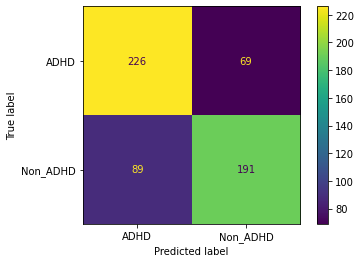

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_test, y_test)  

# XGBClassifier

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier(n_estimators=100,random_state = 42)
xgb.fit(X_train, y_train)
preds = xgb.predict(X_test)
xbg_acc = accuracy_score(y_test,preds)

In [ ]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

        ADHD       0.70      0.76      0.73       295
    Non_ADHD       0.72      0.65      0.68       280

    accuracy                           0.71       575
   macro avg       0.71      0.71      0.71       575
weighted avg       0.71      0.71      0.71       575



# Check Feature importances

# MLP

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(100,),random_state=42)
clf.fit(X_train, y_train)
y_pred_mlp = clf.predict(X_test)
mlp_acc = accuracy_score(y_test,y_pred_mlp)


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
print(classification_report(y_test,y_pred_mlp))

              precision    recall  f1-score   support

        ADHD       0.75      0.69      0.72       295
    Non_ADHD       0.70      0.75      0.73       280

    accuracy                           0.72       575
   macro avg       0.72      0.72      0.72       575
weighted avg       0.73      0.72      0.72       575



# SVC

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC(random_state = 42)
svc.fit(X_train, y_train)
preds = svc.predict(X_test)
svc_acc = accuracy_score(y_test,preds)

print(classification_report(y_test,preds))

              precision    recall  f1-score   support

        ADHD       0.71      0.74      0.73       295
    Non_ADHD       0.71      0.69      0.70       280

    accuracy                           0.71       575
   macro avg       0.71      0.71      0.71       575
weighted avg       0.71      0.71      0.71       575



## KNN

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
import math
k=math.sqrt(60)
classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
knn_acc = accuracy_score(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        ADHD       0.73      0.80      0.77       295
    Non_ADHD       0.77      0.69      0.73       280

    accuracy                           0.75       575
   macro avg       0.75      0.75      0.75       575
weighted avg       0.75      0.75      0.75       575



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


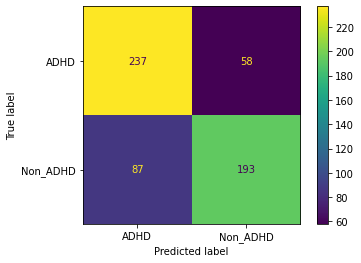

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_test, y_test)  

##NaiveBayes

In [ ]:

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
NB_acc = accuracy_score(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        ADHD       0.57      0.84      0.68       295
    Non_ADHD       0.67      0.34      0.45       280

    accuracy                           0.60       575
   macro avg       0.62      0.59      0.57       575
weighted avg       0.62      0.60      0.57       575



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


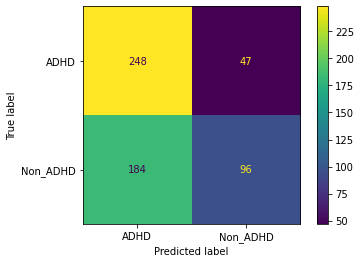

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_test, y_test)  

## ADABoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier(n_estimators=100, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
ada_acc = accuracy_score(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        ADHD       0.69      0.74      0.71       295
    Non_ADHD       0.70      0.65      0.68       280

    accuracy                           0.70       575
   macro avg       0.70      0.70      0.70       575
weighted avg       0.70      0.70      0.70       575



##Bagging

In [ ]:

from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
classifier = BaggingClassifier(base_estimator=SVC(),n_estimators=10, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
bg_acc = accuracy_score(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        ADHD       0.70      0.76      0.73       295
    Non_ADHD       0.72      0.66      0.69       280

    accuracy                           0.71       575
   macro avg       0.71      0.71      0.71       575
weighted avg       0.71      0.71      0.71       575



##LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
classifier = LinearDiscriminantAnalysis()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
lda_acc = accuracy_score(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        ADHD       0.67      0.69      0.68       295
    Non_ADHD       0.67      0.65      0.66       280

    accuracy                           0.67       575
   macro avg       0.67      0.67      0.67       575
weighted avg       0.67      0.67      0.67       575



## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
lg_acc = accuracy_score(y_test,y_pred)
print(lg_acc)
print(classification_report(y_test,y_pred))

0.6765217391304348
              precision    recall  f1-score   support

        ADHD       0.68      0.71      0.69       295
    Non_ADHD       0.68      0.65      0.66       280

    accuracy                           0.68       575
   macro avg       0.68      0.68      0.68       575
weighted avg       0.68      0.68      0.68       575



/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


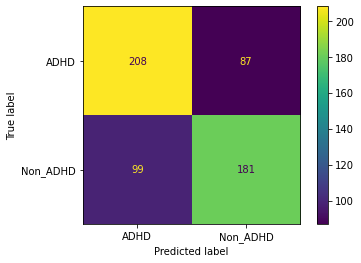

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_test, y_test)  

# performance comparison

In [ ]:
results = pd.DataFrame({
    'Model': ['Decision Tree',
              'Random Forest',
              'Logistic Regression',
              'XGBoost',
              'MLPClassifier',
              'AdaBoost',
              'Bagging',
              'KNN',
              'Naive Bayes',
              'SVC'],
    'Score': [dt_acc,
                rf_acc,
                lg_acc,
                xbg_acc,
                mlp_acc,
              ada_acc,
              bg_acc,
              knn_acc,
              NB_acc,
                svc_acc]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Model')
result_df

,Score
Model,
KNN,0.747826
Random Forest,0.725217
MLPClassifier,0.723478
SVC,0.713043
XGBoost,0.707826
Bagging,0.707826
AdaBoost,0.697391
Logistic Regression,0.676522
Decision Tree,0.641739
